In [17]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print("done")

done


In [18]:
#Load Dataset
df=pd.read_csv('./leuanalysisNew.csv')

df.head()

,CELL,SMEAR,INFIL,LI,BLAST,TEMP,REMISS
0,0.8,0.83,0.66,1.9,1.10,1.00,1
1,0.9,0.36,0.32,1.4,0.74,0.99,1
2,0.8,0.88,0.70,0.8,0.18,0.98,0
3,1.0,0.87,0.87,0.7,1.05,0.99,0
4,0.9,0.75,0.68,1.3,0.52,0.98,1


In [19]:
#Show Key Statistics
df.describe()

,CELL,SMEAR,INFIL,LI,BLAST,TEMP,REMISS
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.881481,0.635185,0.570741,1.003704,0.688519,0.997407,0.333333
std,0.186645,0.214052,0.237567,0.467795,0.534960,0.014830,0.480384
min,0.200000,0.320000,0.080000,0.400000,0.000000,0.980000,0.000000
25%,0.825000,0.430000,0.335000,0.650000,0.230000,0.990000,0.000000
50%,0.950000,0.650000,0.630000,0.900000,0.520000,0.990000,0.000000
75%,1.000000,0.835000,0.740000,1.250000,1.060000,1.005000,1.000000
max,1.000000,0.970000,0.920000,1.900000,2.060000,1.040000,1.000000


<AxesSubplot:>

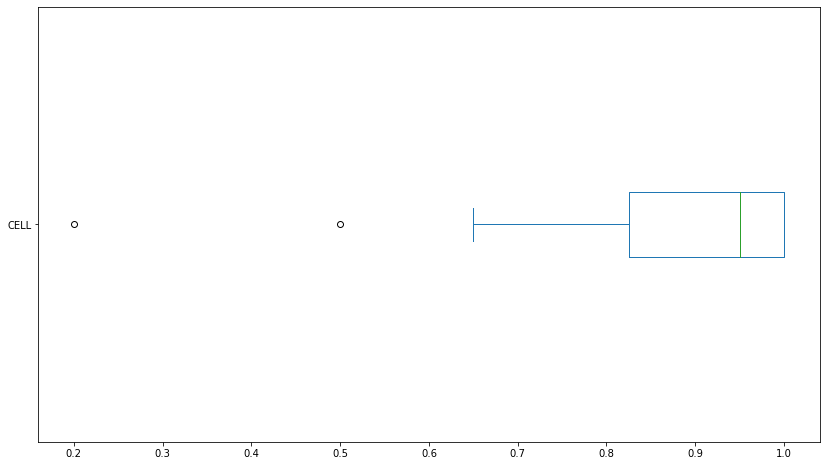

In [16]:
# box plot of cell column
df['CELL'].plot(kind='box',vert=False,figsize=(14,8))

In [29]:
#Create x and y variables
X = df.drop('REMISS',axis=1).to_numpy()
y = df['REMISS'].to_numpy()

#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.20,random_state=100)

#Scale the data
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train2 = sc.fit_transform(X_train)
x_test2 = sc.transform(X_test)

In [30]:
#Script for Neural Network
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(6,4,2),
                    activation='relu',solver='adam',
                    max_iter=10000,random_state=100)  
mlp.fit(x_train2, y_train) 
predictions = mlp.predict(x_test2) 

#Evaluation Report and Matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions)) 

[[3 1]
 [1 1]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.50      0.50      0.50         2

    accuracy                           0.67         6
   macro avg       0.62      0.62      0.62         6
weighted avg       0.67      0.67      0.67         6

